In [1]:
import sys
import cv2
import numpy as np
import random

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# Erode, Dilate

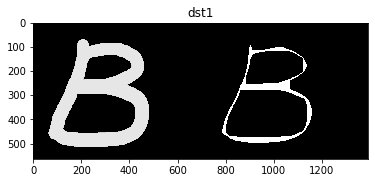

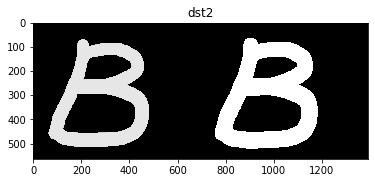

In [16]:
src = cv2.imread('letterb.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

dst1 = cv2.erode(src_bin, None)
for i in range(17) :
    dst1 = cv2.erode(dst1, None)
imshow("dst1", np.hstack((src, dst1)))

dst2 = cv2.dilate(src_bin, None)
for i in range(4) :
    dst2 = cv2.dilate(dst2, None)
imshow("dst2", np.hstack((src, dst2)))

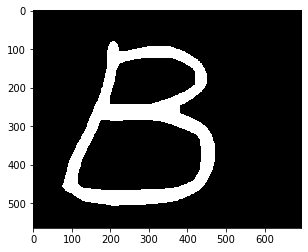

In [21]:
dst1 = cv2.erode(src_bin, None, iterations=10)
imshow("", dst1)

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
print(kernel)

[[0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [1 1 1 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]]


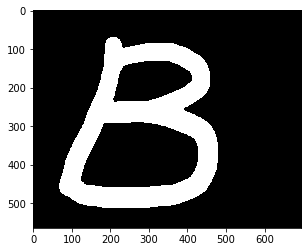

In [26]:
dst1 = cv2.erode(src_bin, kernel, iterations=1)
imshow("", dst1)

# Open, Close

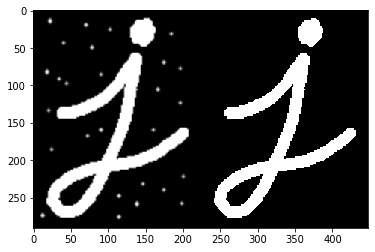

In [30]:
src = cv2.imread('open.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, kernel)
imshow("", np.hstack((src, dst1)))

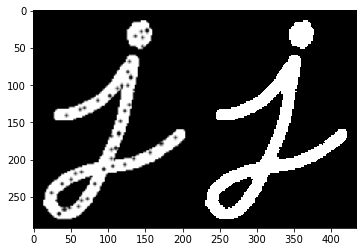

In [33]:
src = cv2.imread('close.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)
imshow("", np.hstack((src, dst1)))

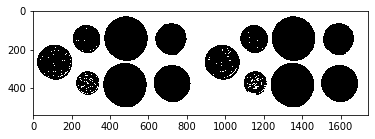

In [43]:
src = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#src_bin = 255 - src_bin
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel)
imshow("", np.hstack((src_bin, dst1)))

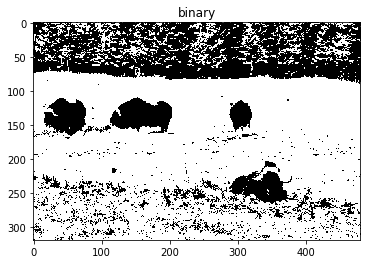

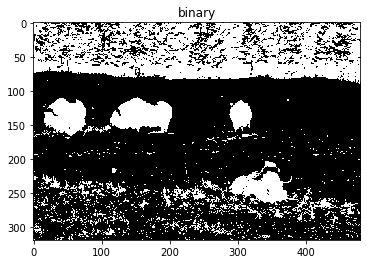

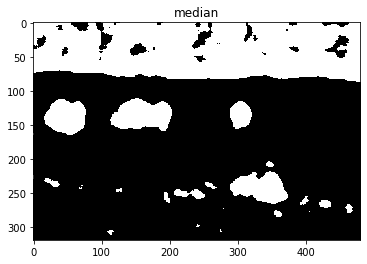

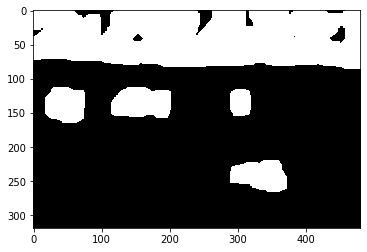

In [76]:
src = cv2.imread('cow.jpg', 0)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("binary", src_bin)
src_bin = 255 -src_bin 
imshow("binary", src_bin)

src_bin = cv2.medianBlur(src_bin, 11)
imshow("median", src_bin)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel, iterations=3)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None, iterations=8)

imshow("", dst1)


2894.0
1036.0
2572.5
3270.5
2.0
117.5
343.5
36052.0


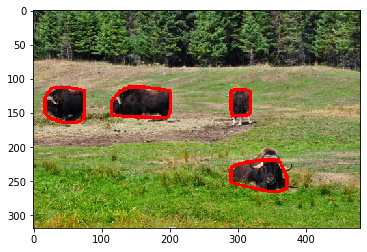

In [78]:
contours, hierarchy = cv2.findContours(dst1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

src = cv2.imread('cow.jpg')

for contour in contours:
    if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 4000:
        hull = cv2.convexHull(contour)
        cv2.drawContours(src, [hull], 0,(0,0,255), 3)
        
imshow("", src)

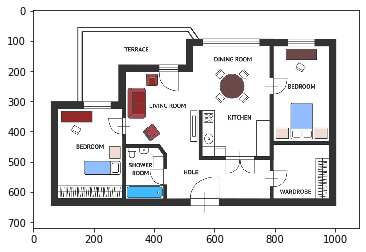

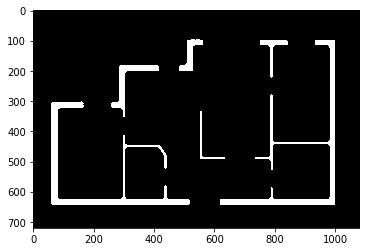

In [92]:
src = cv2.imread('draw.png', 0)
#_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
_, src_bin = cv2.threshold(src, 70, 255, cv2.THRESH_BINARY)

src_bin = 255 - src_bin
src_bin = cv2.medianBlur(src_bin, 11)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_ERODE, kernel)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, kernel)

src = cv2.imread('draw.png')
imshow("", src)
imshow("", dst1)

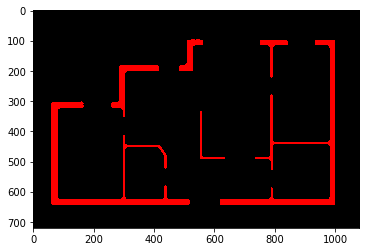

In [93]:
col = np.zeros((dst1.shape[0], dst1.shape[1], 3), dtype="uint8")
col[:,:,2] = dst1
imshow("", col)

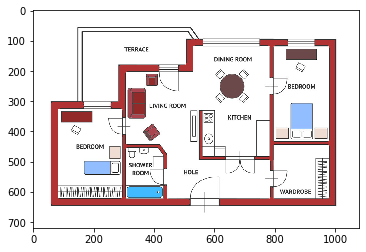

In [99]:
dst2 = cv2.addWeighted(src, 1.0, col, 0.5, 0.0)
imshow("", dst2)

# 골격화


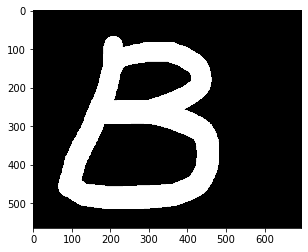

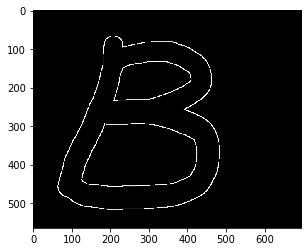

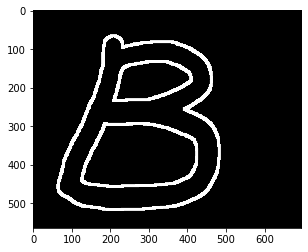

In [105]:
src = cv2.imread('letterb.png', cv2.IMREAD_GRAYSCALE)

dst1 = cv2.morphologyEx(src, cv2.MORPH_GRADIENT, None)

imshow("", src)
imshow("", dst1)

dst1 = cv2.dilate(dst1, None, iterations=3)

imshow("", dst1)

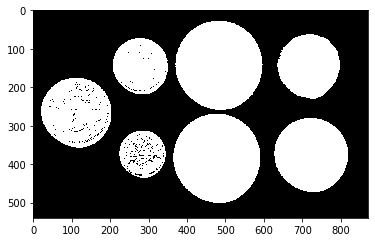

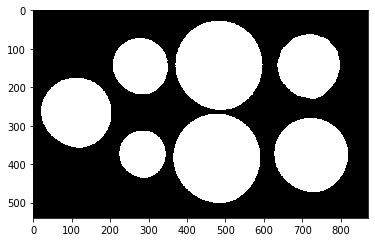

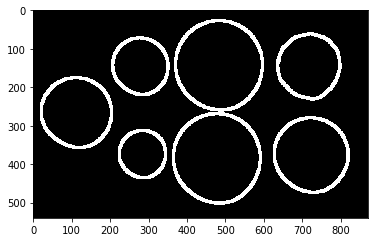

In [112]:
src = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = 255 - src_bin

imshow("", src_bin)
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, kernel, iterations=2)
imshow("", dst1)

dst1 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, None)

dst1 = cv2.dilate(dst1, None, iterations=3)
imshow("", dst1)



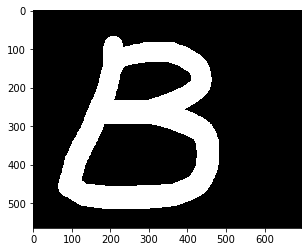

0


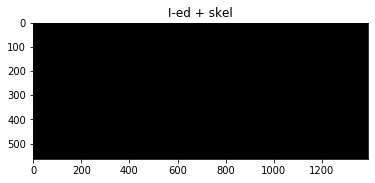

1


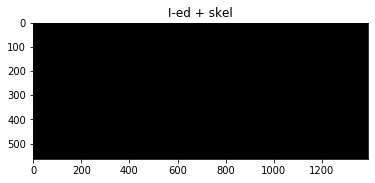

2


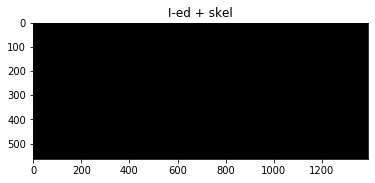

3


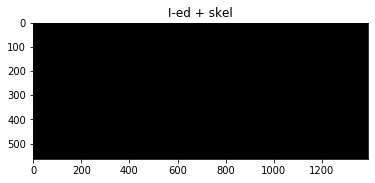

4


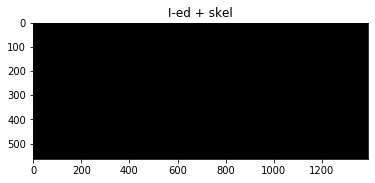

5


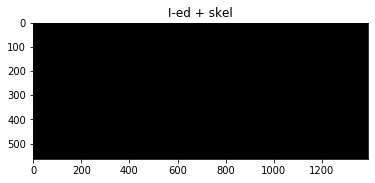

6


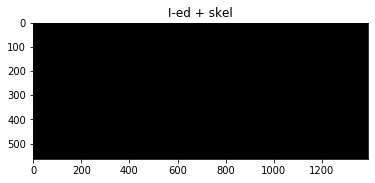

7


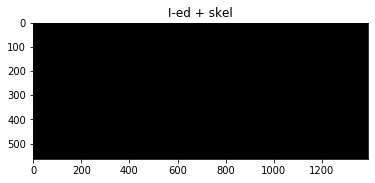

8


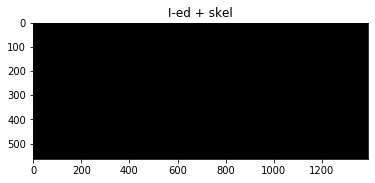

9


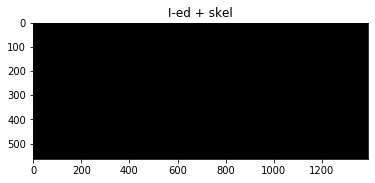

10


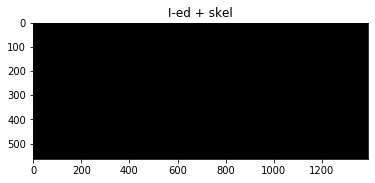

11


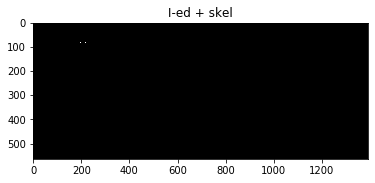

12


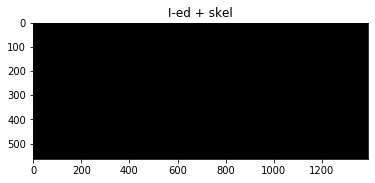

13


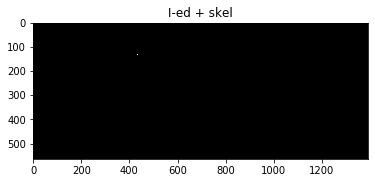

14


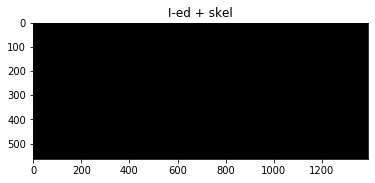

15


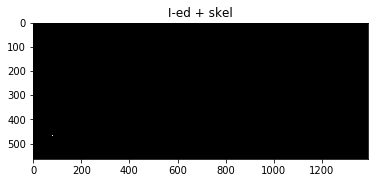

16


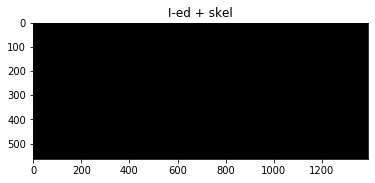

17


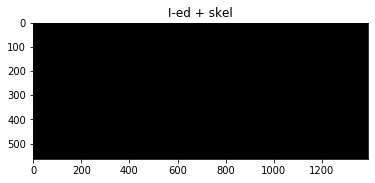

18


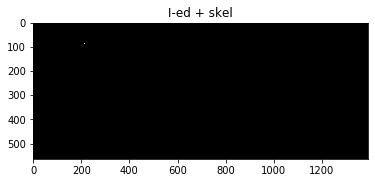

19


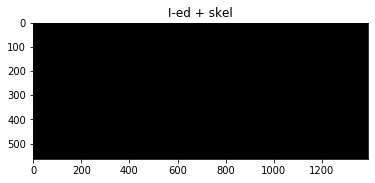

20


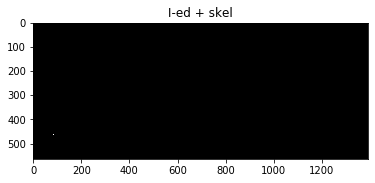

21


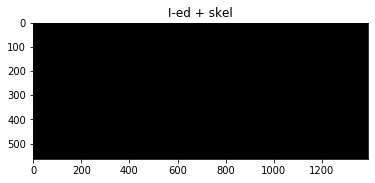

22


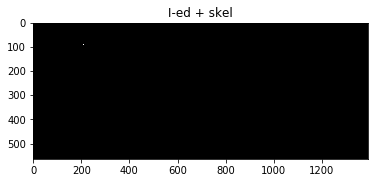

23


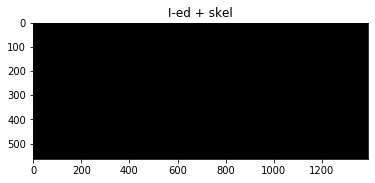

24


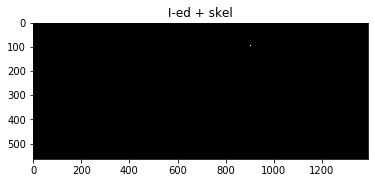

25


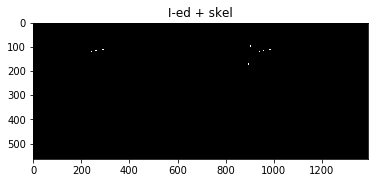

26


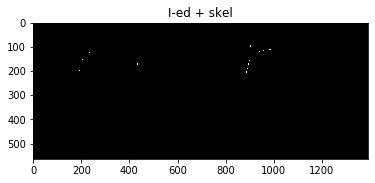

27


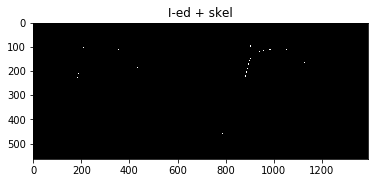

28


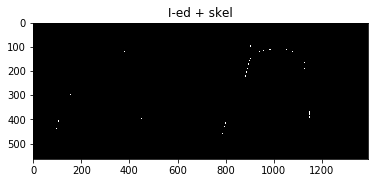

29


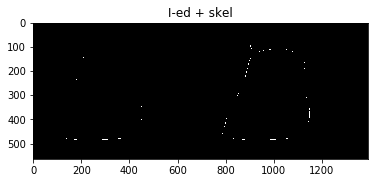

30


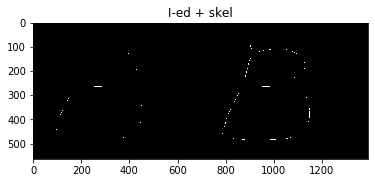

31


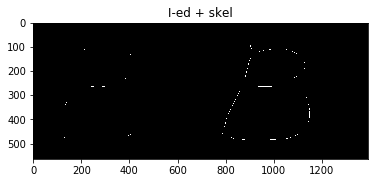

32


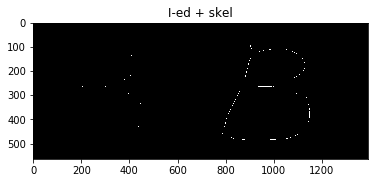

33


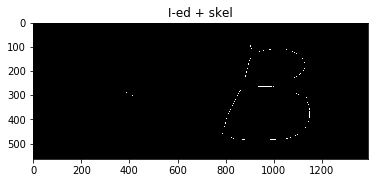

34


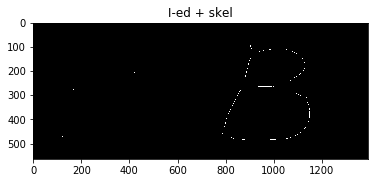

35


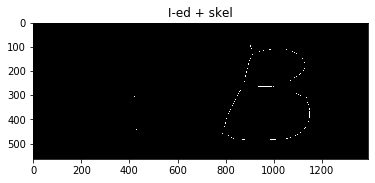

36


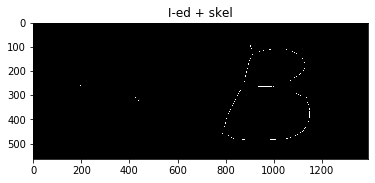

37


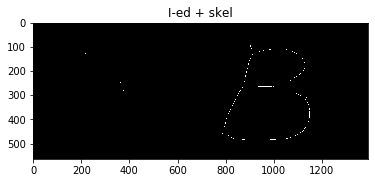

38


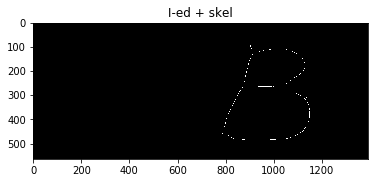

39


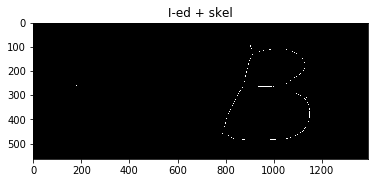

40


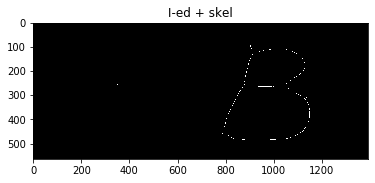

41


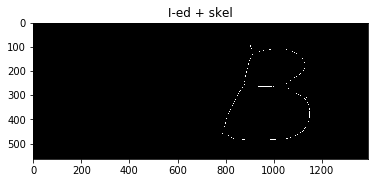

42


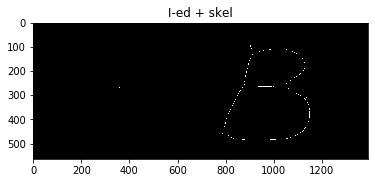

43


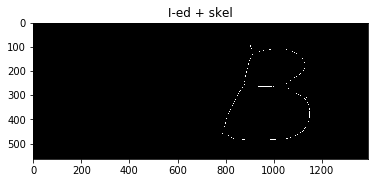

44


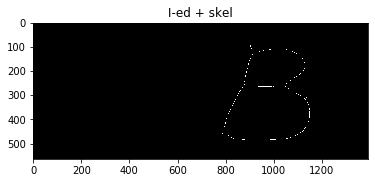

45


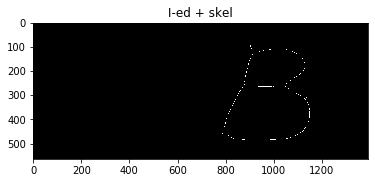

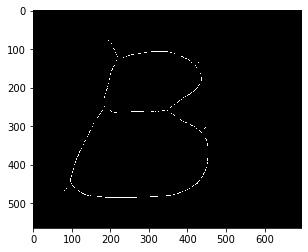

True

In [130]:
src = cv2.imread('letterb.png', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#src_bin = 255 - src_bin

skel = src_bin.copy()
imshow("", src_bin)
skel[:,:] = 0
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

i = 0
while True:
        print(i)
        i += 1
        eroded = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp  = cv2.subtract(src_bin, temp)
        
        skel = cv2.bitwise_or(skel, temp)
        imshow("I-ed + skel", np.hstack((temp, skel)))
        src_bin[:,:] = eroded[:,:]
        if cv2.countNonZero(src_bin) == 0:
            break
            
imshow("", skel)   
cv2.imwrite("out.png", skel)


# Color mapping

(512, 512, 3)


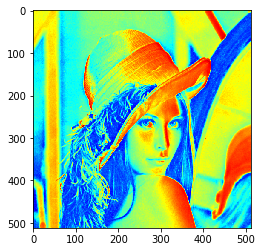

In [135]:
im_gray = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET) # JET, HOT
print(im_color.shape)
imshow("", im_color)

In [168]:
img = cv2.imread('detectcirclesexample.png')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

print(img_hsv[205, 164, : ])
print(img_hsv[196, 329, : ])

[ 29 251 250]
[112 253 253]


[ 29 253 251]
[111 253 254]


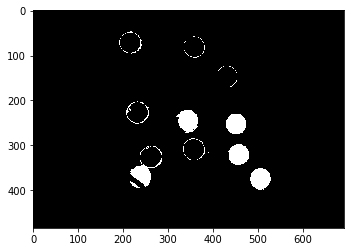

In [169]:
print(img_hsv[206,168,:])
print(img_hsv[326,411,:])
lower_red = (0, 50, 50)
upper_red = (10, 255, 255)
img_mask = cv2.inRange(img_hsv, lower_red, upper_red)
imshow("", img_mask)

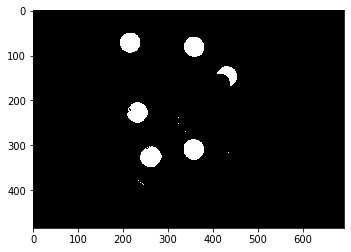

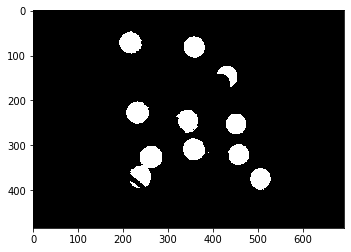

In [140]:
lower_red = np.array([170,50,50])
upper_red = np.array([180,255,255])
img_mask2 = cv2.inRange(img_hsv, lower_red, upper_red)
imshow("", img_mask2)

added_red = cv2.addWeighted(img_mask, 1.0, img_mask2, 1.0, 0.0)

imshow("", added_red)

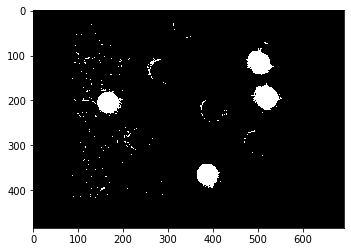

In [170]:
lower_yellow = (29-5, 50, 50)
upper_yellow = (29+5, 255, 255)

img_mask3 = cv2.inRange(img_hsv, lower_yellow, upper_yellow)
imshow("", img_mask3)

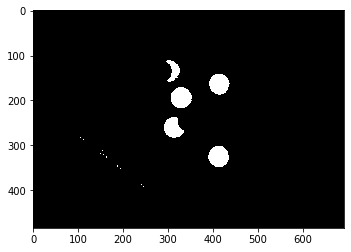

In [171]:
lower_blue = (112-5, 50, 50)
upper_blue = (112+5, 255, 255)

img_mask4 = cv2.inRange(img_hsv, lower_blue, upper_blue)
imshow("", img_mask4)

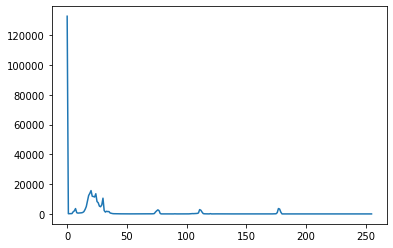

In [172]:
hist_h = cv2.calcHist([img_hsv],[0],None,[256],[0,256])
plt.plot(hist_h)

(array([], dtype=int64), array([], dtype=int64))


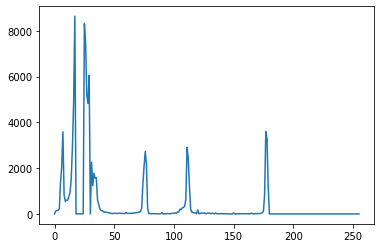

In [174]:
h = np.where( hist_h > 10000)
print(h)
hist_h[h[0]] = 0
plt.plot(hist_h)

In [175]:
from sklearn.cluster import KMeans
X = img_hsv[:,:,0].flatten().reshape(-1,1)
print(X.shape)

(334928, 1)


In [176]:
model = KMeans(n_clusters=7, init="random", max_iter=20).fit(X)
p = model.cluster_centers_
print(p)

[[ 30.90031571]
 [ 75.06015738]
 [ 23.54979259]
 [ 17.8943856 ]
 [  0.40738468]
 [111.84747465]
 [177.01485995]]


In [187]:
a = np.array([ 1,4,5, 20, 4])

print(a > 2)

b = np.where(a>4)
c = b[0]
a[c] = 100
print(a)

[False  True  True  True  True]
[  1   4 100 100   4]


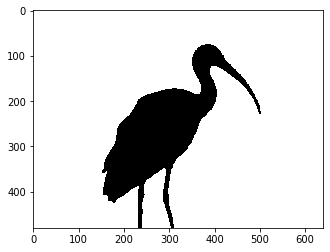

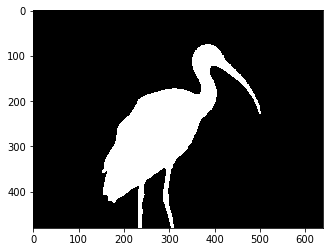

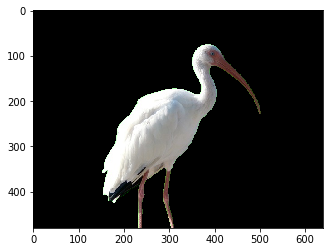

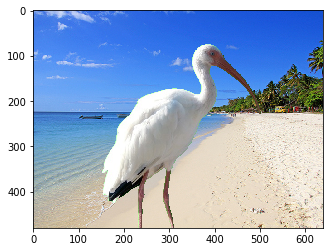

In [196]:
img = cv2.imread("chroma.jpg")
img2 = cv2.imread("beach.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

lower_chroma = (60-10, 100, 100)
upper_chroma = (60+10, 255, 255)

green_screen = cv2.inRange(img_hsv, lower_chroma, upper_chroma)

inverted = cv2.bitwise_not(green_screen)
dst = cv2.bitwise_and(img, img, mask=inverted)   #세그멘테이션(전경)

dst1 = cv2.bitwise_or(dst, img2, mask=green_screen)   # 배경만 취한다.
dst1 = cv2.bitwise_or(dst, dst1)                      #전경더한다.  dst1 = dst + dst1

imshow("", green_screen)
imshow("", inverted)
imshow("", dst)
imshow("", dst1)

In [7]:
cap = cv2.VideoCapture(0)

while(cap.isOpened()):
    ret, frame = cap.read()        
    if not ret : break
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    lower_red = (18, 10, 10)
    upper_red = (27, 255, 255)
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    kernel = np.ones((15,15),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    if cv2.waitKey(10) == 27:
            break            
    
cap.release()
cv2.destroyAllWindows()

In [6]:
img = cv2.imread("yellow.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(img_hsv[110,250,:])

[ 22 170 174]


# FT ( DFT, FFT)

In [76]:
origin_img = cv2.imread('ft01.png', 0).astype(np.float32) # gray scale
origin_img = origin_img / 255
print(origin_img.shape)
fft = cv2.dft(origin_img, flags=cv2.DFT_COMPLEX_OUTPUT)

print(fft.shape)
#print(fft)

(100, 100)
(100, 100, 2)


(100, 100, 2)
(100, 100)
0.0
4700.0


8.4553175

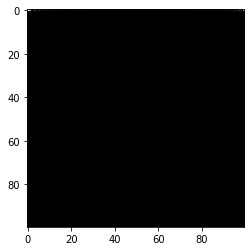

In [77]:
#shifted = np.fft.fftshift(fft, axes=[0,1])
shifted  = fft
print(shifted.shape)
#print(shifted)
magnitude = cv2.magnitude(shifted[:,:,0], shifted[:,:,1])

print(magnitude.shape)
#print(magnitude)
plt.imshow(magnitude, cmap='gray')
print(np.min(magnitude))
print(np.max(magnitude))
np.log(np.max(magnitude))

In [78]:
magnitude = np.log(magnitude+1)

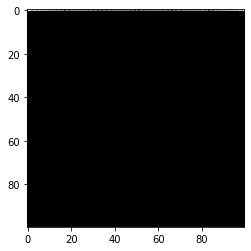

In [79]:
plt.imshow(magnitude, cmap="gray")

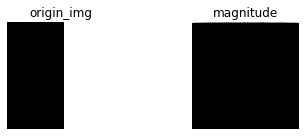

In [80]:
plt.figure(figsize=(8,2))
plt.subplot(131)
plt.axis('off')
plt.title('origin_img')
plt.imshow(origin_img, cmap='gray')
plt.subplot(132)
plt.axis('off')
plt.title('magnitude')
plt.imshow(magnitude, cmap='gray')
plt.tight_layout()

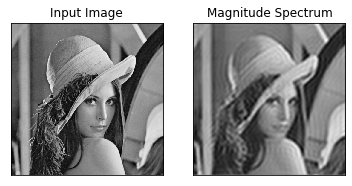

In [89]:
img = cv2.imread('lenna.bmp',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2)

mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1


fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()